In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from math import sqrt 



In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import os 
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib.cm import get_cmap


In [20]:


file_paths = glob("C:/Users/yoyo/Nanyang Technological University/FYP_wang xiaoni/Site 02 - 00 - NTU - N3.2-B02-01m - Origin Node/*.csv")

merged_data = pd.DataFrame()

for file_path in file_paths:
    data = pd.read_csv(file_path, header = None)
    merged_data = pd.concat([merged_data, data], ignore_index=True)

merged_data.to_csv("merged_data.csv", index=False)


In [21]:
df = merged_data

In [22]:
temp_time = df[[5, 7, 9, 13, 15, 17]]
column_mapping = {
    5: 'year',
    7: 'month',
    9: 'day',
    13: 'hour',
    15: 'minute',
    17: 'second',
}

temp_time.rename(columns=column_mapping, inplace=True)


In [23]:
datetime_series = pd.to_datetime(temp_time)
df['datetime'] = datetime_series

In [24]:
columns_to_drop = [4, 5, 6, 7, 8,9,12,13,14,15,16,17]  

df.drop(columns=columns_to_drop, inplace=True)

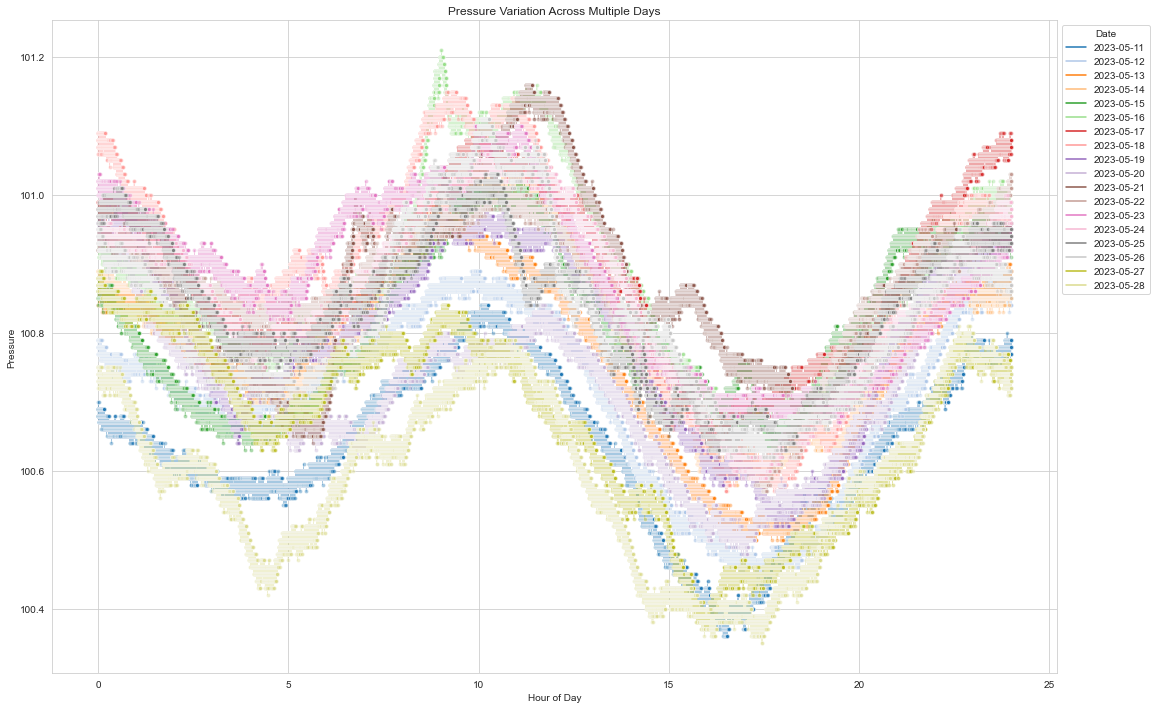

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 假设您的数据在一个名为df的DataFrame中，列名为'datetime'和'pressure'
# 请根据实际情况进行替换

# 将datetime列转换为datetime类型

# 添加一列，标记每一天
df['date'] = df['datetime'].dt.date

# 设置seaborn样式
sns.set_style("whitegrid")

plt.figure(figsize=(18, 12))

# 使用seaborn绘制每一天的压力数据并叠加在同一张图上
sns.lineplot(data=df, x=df['datetime'].dt.hour + df['datetime'].dt.minute / 60 + df['datetime'].dt.second / 3600,
             y=df[19], hue='date', palette='tab20', alpha=0.4, marker='o', markersize=4, linewidth=0.7)

plt.xlabel('Hour of Day')
plt.ylabel('Pressure')
plt.title('Pressure Variation Across Multiple Days')
plt.grid(True)
plt.legend(title='Date', bbox_to_anchor=(1, 1))
# plt.ylim(90, 110)  # 设置y轴刻度范围
plt.show()


In [26]:

column_mapping = {
    1: 'tick',
    3: 'unix_time',
    11: 'Day_of_Week',
    19: 'Pressure',
    22: 'BARO_Temperature',
    25: 'Temperature',
    28: 'Humidity',
    31: 'APDS9960_proximity',
    33: 'APDS9960_red',
    35: 'APDS9960_green',
    37: 'APDS9960_blue',
    39: 'accel_x',
    42: 'accel_y',
    45: 'accel_z',
    48: 'gyro_x',
    51: 'gyro_y',
    54: 'gyro_z',
    57: 'magnetometer_x',
    60: 'magnetometer_y',
    63: 'magnetometer_z',
}

df.rename(columns=column_mapping, inplace=True)
columns_to_drop = [0,2,10,18,20,21,23,24,26,27,29,30,32,34,36,38,40,41,43,44,46,47,49,50,52,53,55,56,58,59,61,62,64,65]  

df.drop(columns=columns_to_drop, inplace=True)

In [27]:
sundays_data = df[df['datetime'].dt.day_name() == 'Sunday']

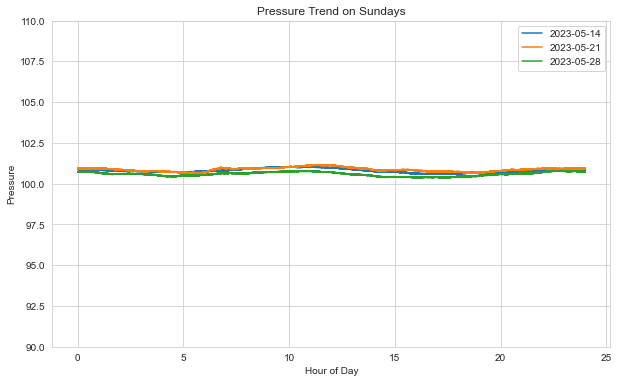

In [28]:
import matplotlib.pyplot as plt
import pandas as pd



df['datetime'] = pd.to_datetime(df['datetime'])

sundays_data = df[df['datetime'].dt.weekday == 6]  

plt.figure(figsize=(10, 6))

for date, group in sundays_data.groupby(sundays_data['datetime'].dt.date):
    plt.plot(group['datetime'].dt.hour + group['datetime'].dt.minute / 60 + group['datetime'].dt.second / 3600,
             group['Pressure'], label=date)

plt.xlabel('Hour of Day')
plt.ylabel('Pressure')
plt.title('Pressure Trend on Sundays')
plt.legend()
plt.grid(True)
plt.ylim(90, 110)  
plt.show()


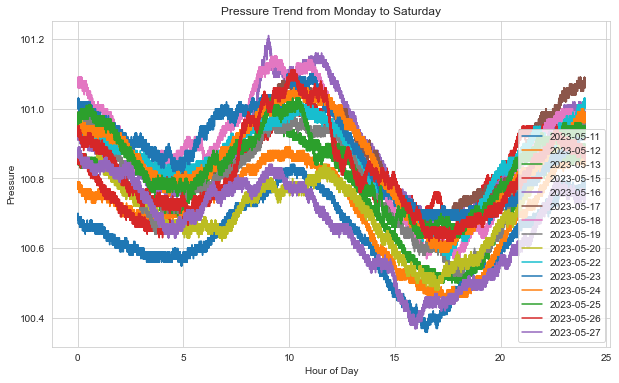

In [29]:
import matplotlib.pyplot as plt
import pandas as pd



df['datetime'] = pd.to_datetime(df['datetime'])

mon_to_sat_data = df[(df['datetime'].dt.dayofweek >= 0) & (df['datetime'].dt.dayofweek <= 5)]

plt.figure(figsize=(10, 6))

for date, group in mon_to_sat_data.groupby(mon_to_sat_data['datetime'].dt.date):
    plt.plot(group['datetime'].dt.hour + group['datetime'].dt.minute / 60 + group['datetime'].dt.second / 3600,
             group['Pressure'], label=date)

plt.xlabel('Hour of Day')
plt.ylabel('Pressure')
plt.title('Pressure Trend from Monday to Saturday')
plt.legend()
plt.grid(True)
# plt.ylim(90, 110)  
plt.show()



In [30]:
mon_to_sat_data

,tick,unix_time,Day_of_Week,Pressure,BARO_Temperature,Temperature,Humidity,APDS9960_proximity,APDS9960_red,APDS9960_green,...,accel_y,accel_z,gyro_x,gyro_y,gyro_z,magnetometer_x,magnetometer_y,magnetometer_z,datetime,date
0,185628,1683763200,Thursday,100.69,28.08,28.21,69.85,250,0,0,...,-0.06,0.97,0.92,0.12,-0.67,41.83,2.84,2.17,2023-05-11 00:00:00,2023-05-11
1,185629,1683763201,Thursday,100.69,28.07,28.17,69.76,252,0,0,...,-0.06,0.97,1.10,0.31,-0.61,41.77,3.19,1.18,2023-05-11 00:00:01,2023-05-11
2,185630,1683763202,Thursday,100.68,28.08,28.19,69.92,252,0,0,...,-0.06,0.97,1.10,0.31,-0.55,41.11,2.88,1.79,2023-05-11 00:00:02,2023-05-11
3,185631,1683763204,Thursday,100.68,28.07,28.19,69.89,250,0,0,...,-0.06,0.97,0.92,-0.37,-1.04,42.00,2.60,1.86,2023-05-11 00:00:04,2023-05-11
4,185632,1683763205,Thursday,100.69,28.09,28.21,69.86,250,0,0,...,-0.06,0.97,0.79,-0.06,-0.49,41.28,2.97,2.67,2023-05-11 00:00:05,2023-05-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232572,1418200,1685231994,Saturday,100.74,27.93,28.22,72.28,250,0,0,...,-0.01,0.98,1.04,0.24,-0.55,42.41,6.13,5.54,2023-05-27 23:59:54,2023-05-27
1232573,1418201,1685231995,Saturday,100.75,27.92,28.21,72.31,252,0,0,...,-0.01,0.98,1.10,-0.18,-0.92,42.26,5.83,5.20,2023-05-27 23:59:55,2023-05-27
1232574,1418202,1685231997,Saturday,100.75,27.93,28.21,72.28,252,0,0,...,-0.01,0.98,0.92,0.00,-0.61,42.14,5.58,4.71,2023-05-27 23:59:57,2023-05-27
1232575,1418203,1685231998,Saturday,100.74,27.92,28.19,72.46,251,0,0,...,-0.01,0.98,0.61,-0.24,-0.98,42.99,5.48,5.85,2023-05-27 23:59:58,2023-05-27


In [31]:

# Assuming you have already loaded and processed your DataFrame 'df'

df['datetime'] = pd.to_datetime(df['datetime'])

mon_to_sat_data = df[(df['datetime'].dt.dayofweek >= 0) & (df['datetime'].dt.dayofweek <= 5)]

# Create empty lists to store evaluation metrics
mse_list = []
mae_list = []
r2_list = []
rmse_list = []

n_values = range(1, 51)

for n in n_values:
    mse_values = []
    mae_values = []
    r2_values = []
    rmse_values = []

    for date, group in sundays_data.groupby(sundays_data['datetime'].dt.date):
        x = group['datetime'].dt.hour + group['datetime'].dt.minute / 60 + group['datetime'].dt.second / 3600
        y = group['Pressure']

        poly_features = PolynomialFeatures(degree=n)  # Varying degree
        x_poly = poly_features.fit_transform(x.values.reshape(-1, 1))  

        model = LinearRegression()
        model.fit(x_poly, y)

        y_pred = model.predict(x_poly)
        mse = mean_squared_error(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        rmse = sqrt(mse)

        mse_values.append(mse)
        mae_values.append(mae)
        r2_values.append(r2)
        rmse_values.append(rmse)

    mse_list.append(np.mean(mse_values))
    mae_list.append(np.mean(mae_values))
    r2_list.append(np.mean(r2_values))
    rmse_list.append(np.mean(rmse_values))

# Find the best n based on a chosen metric (e.g., R^2)
best_n_index = np.argmax(r2_list)
best_n = n_values[best_n_index]

# Print evaluation metrics and best degrees
print("Evaluation Metrics:")
print(f"n\tMSE\t\tMAE\t\tR^2\t\tRMSE")
for i, n in enumerate(n_values):
    print(f"{n}\t{mse_list[i]:.4f}\t{mae_list[i]:.4f}\t{r2_list[i]:.4f}\t{rmse_list[i]:.4f}")

print("\nBest degrees:")
print(f"Best n value: {best_n}")


Evaluation Metrics:
n	MSE		MAE		R^2		RMSE
1	0.0145	0.1014	0.0214	0.1205
2	0.0138	0.1008	0.0676	0.1176
3	0.0118	0.0899	0.2071	0.1083
4	0.0058	0.0635	0.6109	0.0759
5	0.0035	0.0489	0.7626	0.0590
6	0.0015	0.0304	0.9016	0.0376
7	0.0010	0.0244	0.9305	0.0309
8	0.0010	0.0235	0.9341	0.0297
9	0.0009	0.0207	0.9424	0.0268
10	0.0008	0.0204	0.9432	0.0266
11	0.0008	0.0203	0.9432	0.0265
12	0.0009	0.0218	0.9373	0.0282
13	0.0019	0.0313	0.8707	0.0422
14	0.0023	0.0342	0.8432	0.0468
15	0.0024	0.0341	0.8360	0.0479
16	0.0023	0.0327	0.8420	0.0470
17	0.0023	0.0335	0.8442	0.0469
18	0.0049	0.0569	0.6706	0.0693
19	0.0058	0.0608	0.6092	0.0755
20	0.0065	0.0626	0.5611	0.0800
21	0.0070	0.0631	0.5286	0.0829
22	0.0073	0.0628	0.5096	0.0845
23	0.0074	0.0621	0.5004	0.0852
24	0.0075	0.0613	0.4972	0.0854
25	0.0075	0.0609	0.4966	0.0854
26	0.0075	0.0606	0.4964	0.0854
27	0.0075	0.0613	0.4949	0.0856
28	0.0076	0.0624	0.4893	0.0861
29	0.0078	0.0646	0.4764	0.0873
30	0.0090	0.0740	0.3932	0.0947
31	0.0093	0.0758	0.3734	0.0963
32	0.0

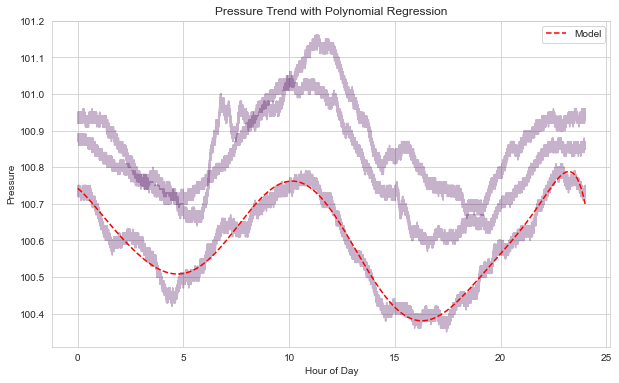

In [32]:
# Assuming you have already loaded and processed your DataFrame 'df'

df['datetime'] = pd.to_datetime(df['datetime'])

# mon_to_sat_data = df[(df['datetime'].dt.dayofweek >= 0) & (df['datetime'].dt.dayofweek <= 5)]

plt.figure(figsize=(10, 6))

# Create a color map
cmap = get_cmap('viridis', len(sundays_data))

for i, (date, group) in enumerate(sundays_data.groupby(sundays_data['datetime'].dt.date)):
    x = group['datetime'].dt.hour + group['datetime'].dt.minute / 60 + group['datetime'].dt.second / 3600
    y = group['Pressure']
    
    plt.plot(x, y, color=cmap(i), alpha=0.3)

poly_features = PolynomialFeatures(degree=11)  # You can change the degree as needed
x_poly = poly_features.fit_transform(x.values.reshape(-1, 1))  # Convert Series to NumPy array

model = LinearRegression()
model.fit(x_poly, y)

x_range = np.linspace(x.min(), x.max(), 1000)
x_range_poly = poly_features.transform(x_range.reshape(-1, 1))

plt.plot(x_range, model.predict(x_range_poly), linestyle='dashed', color='red', label='Model')

plt.xlabel('Hour of Day')
plt.ylabel('Pressure')
# plt.ylim(90, 110)
# plt.ylim(90, 110)

plt.title('Pressure Trend with Polynomial Regression')
plt.legend()
plt.grid(True)

plt.show()

In [33]:
#0-110+  

Evaluation Metrics:
n	MSE		MAE		R^2		RMSE
1	0.0120	0.0936	0.0703	0.1095
2	0.0118	0.0928	0.0853	0.1086
3	0.0083	0.0795	0.3539	0.0913
4	0.0037	0.0523	0.7137	0.0608
5	0.0017	0.0361	0.8708	0.0408
6	0.0003	0.0158	0.9766	0.0174
7	0.0001	0.0064	0.9955	0.0076
8	0.0000	0.0039	0.9982	0.0048
9	0.0000	0.0026	0.9991	0.0034
10	0.0000	0.0024	0.9992	0.0032
11	0.0000	0.0024	0.9993	0.0030
12	0.0001	0.0077	0.9897	0.0115
13	0.0008	0.0197	0.9361	0.0287
14	0.0010	0.0201	0.9240	0.0313
15	0.0010	0.0182	0.9240	0.0313
16	0.0009	0.0173	0.9272	0.0306
17	0.0018	0.0347	0.8576	0.0429
18	0.0023	0.0392	0.8217	0.0480
19	0.0027	0.0417	0.7899	0.0521
20	0.0030	0.0426	0.7654	0.0550
21	0.0032	0.0435	0.7490	0.0569
22	0.0034	0.0430	0.7398	0.0579
23	0.0034	0.0420	0.7362	0.0583
24	0.0034	0.0409	0.7361	0.0583
25	0.0034	0.0398	0.7380	0.0581
26	0.0034	0.0391	0.7403	0.0579
27	0.0037	0.0482	0.7099	0.0612
28	0.0039	0.0503	0.6961	0.0626
29	0.0041	0.0525	0.6804	0.0642
30	0.0043	0.0545	0.6631	0.0659
31	0.0046	0.0563	0.6449	0.0677
32	0.0

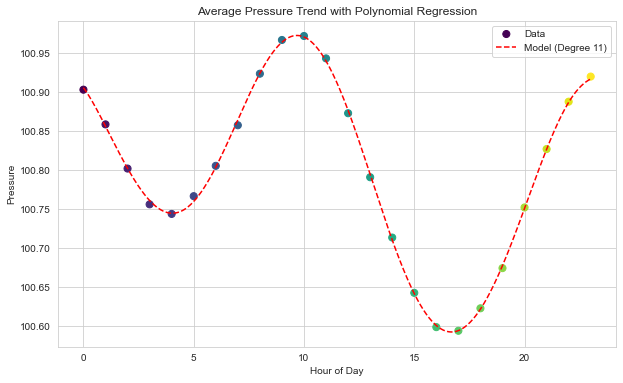

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Assuming you have already loaded and processed your DataFrame 'df'

df['datetime'] = pd.to_datetime(df['datetime'])

# Filter the data for weekdays (Monday to Saturday)
mon_to_sat_data = df[(df['datetime'].dt.dayofweek >= 0) & (df['datetime'].dt.dayofweek <= 5)]

# Create an empty DataFrame to store the aggregated data
average_data = pd.DataFrame(columns=['hour', 'Pressure'])

# Calculate the average pressure for each hour of the day
for hour in range(24):
    hourly_data = mon_to_sat_data[mon_to_sat_data['datetime'].dt.hour == hour]
    average_pressure = hourly_data['Pressure'].mean()
    average_data = average_data.append({'hour': hour, 'Pressure': average_pressure}, ignore_index=True)

# Create arrays for x and y values
x = average_data['hour'].values.reshape(-1, 1)
y = average_data['Pressure'].values

# Create empty lists to store evaluation metrics
mse_list = []
mae_list = []
r2_list = []
rmse_list = []

n_values = range(1, 51)

for n in n_values:
    mse_values = []
    mae_values = []
    r2_values = []
    rmse_values = []

    poly_features = PolynomialFeatures(degree=n)
    x_poly = poly_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)

    y_pred = model.predict(x_poly)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    rmse = sqrt(mse)

    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)
    rmse_values.append(rmse)

    mse_list.append(np.mean(mse_values))
    mae_list.append(np.mean(mae_values))
    r2_list.append(np.mean(r2_values))
    rmse_list.append(np.mean(rmse_values))

# Find the best n based on a chosen metric (e.g., R^2)
best_n_index = np.argmax(r2_list)
best_n = n_values[best_n_index]

# Print evaluation metrics and best degrees
print("Evaluation Metrics:")
print(f"n\tMSE\t\tMAE\t\tR^2\t\tRMSE")
for i, n in enumerate(n_values):
    print(f"{n}\t{mse_list[i]:.4f}\t{mae_list[i]:.4f}\t{r2_list[i]:.4f}\t{rmse_list[i]:.4f}")

print("\nBest degrees:")
print(f"Best n value: {best_n}")

# Create a color map
cmap = get_cmap('viridis', len(average_data))

plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=range(len(average_data)), cmap=cmap, label='Data', s=50)

poly_features = PolynomialFeatures(degree=best_n)
x_poly = poly_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

x_range = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)

y_pred = model.predict(x_range_poly)
plt.plot(x_range, y_pred, linestyle='dashed', color='red', label=f'Model (Degree {best_n})')

plt.xlabel('Hour of Day')
plt.ylabel('Pressure')
plt.title('Average Pressure Trend with Polynomial Regression')
plt.legend()
plt.grid(True)

plt.show()


Evaluation Metrics:
n	MSE		MAE		R^2		RMSE
1	0.0125	0.0968	0.0145	0.1120
2	0.0125	0.0969	0.0146	0.1120
3	0.0105	0.0859	0.1741	0.1025
4	0.0047	0.0586	0.6280	0.0688
5	0.0025	0.0437	0.8003	0.0504
6	0.0007	0.0217	0.9417	0.0272
7	0.0004	0.0152	0.9707	0.0193
8	0.0003	0.0160	0.9729	0.0186
9	0.0003	0.0121	0.9793	0.0162
10	0.0003	0.0123	0.9795	0.0162
11	0.0003	0.0128	0.9793	0.0162
12	0.0004	0.0160	0.9683	0.0201
13	0.0013	0.0250	0.8951	0.0366
14	0.0016	0.0259	0.8746	0.0400
15	0.0016	0.0249	0.8716	0.0404
16	0.0016	0.0222	0.8782	0.0394
17	0.0030	0.0451	0.7654	0.0547
18	0.0039	0.0512	0.6973	0.0621
19	0.0047	0.0548	0.6336	0.0683
20	0.0053	0.0575	0.5821	0.0729
21	0.0058	0.0586	0.5454	0.0761
22	0.0061	0.0584	0.5224	0.0780
23	0.0062	0.0572	0.5101	0.0790
24	0.0063	0.0555	0.5053	0.0794
25	0.0063	0.0544	0.5049	0.0794
26	0.0063	0.0533	0.5067	0.0792
27	0.0064	0.0583	0.4952	0.0802
28	0.0065	0.0598	0.4878	0.0808
29	0.0066	0.0614	0.4790	0.0814
30	0.0068	0.0628	0.4690	0.0822
31	0.0069	0.0640	0.4581	0.0831
32	0.0

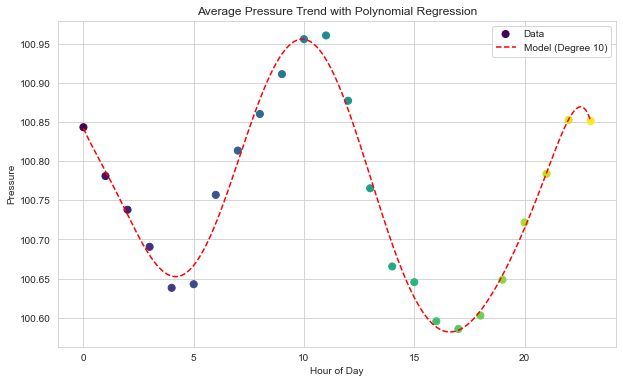

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Assuming you have already loaded and processed your DataFrame 'df'

df['datetime'] = pd.to_datetime(df['datetime'])

# Filter the data for Sundays for three days and group by hour
sundays_data = df[df['datetime'].dt.dayofweek == 6]  # Assuming Sunday is the day of interest
sundays_data_grouped = sundays_data.groupby([sundays_data['datetime'].dt.hour])['Pressure'].mean().reset_index()

# Create arrays for x and y values
x = sundays_data_grouped['datetime'].values.reshape(-1, 1)
y = sundays_data_grouped['Pressure'].values

# Create empty lists to store evaluation metrics
mse_list = []
mae_list = []
r2_list = []
rmse_list = []

n_values = range(1, 51)

for n in n_values:
    mse_values = []
    mae_values = []
    r2_values = []
    rmse_values = []

    poly_features = PolynomialFeatures(degree=n)
    x_poly = poly_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)

    y_pred = model.predict(x_poly)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    rmse = sqrt(mse)

    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)
    rmse_values.append(rmse)

    mse_list.append(np.mean(mse_values))
    mae_list.append(np.mean(mae_values))
    r2_list.append(np.mean(r2_values))
    rmse_list.append(np.mean(rmse_values))

# Find the best n based on a chosen metric (e.g., R^2)
best_n_index = np.argmax(r2_list)
best_n = n_values[best_n_index]

# Print evaluation metrics and best degrees
print("Evaluation Metrics:")
print(f"n\tMSE\t\tMAE\t\tR^2\t\tRMSE")
for i, n in enumerate(n_values):
    print(f"{n}\t{mse_list[i]:.4f}\t{mae_list[i]:.4f}\t{r2_list[i]:.4f}\t{rmse_list[i]:.4f}")

print("\nBest degrees:")
print(f"Best n value: {best_n}")

# Fit the model with the best degree
poly_features = PolynomialFeatures(degree=best_n)
x_poly = poly_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

# Print the model parameters
print("Model Parameters:")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Create a color map
cmap = get_cmap('viridis', len(sundays_data_grouped))

plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=range(len(sundays_data_grouped)), cmap=cmap, label='Data', s=50)

x_range = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)

y_pred = model.predict(x_range_poly)
plt.plot(x_range, y_pred, linestyle='dashed', color='red', label=f'Model (Degree {best_n})')

plt.xlabel('Hour of Day')
plt.ylabel('Pressure')
plt.title('Average Pressure Trend with Polynomial Regression')
plt.legend()
plt.grid(True)

plt.show()


# Pressure Ridge 

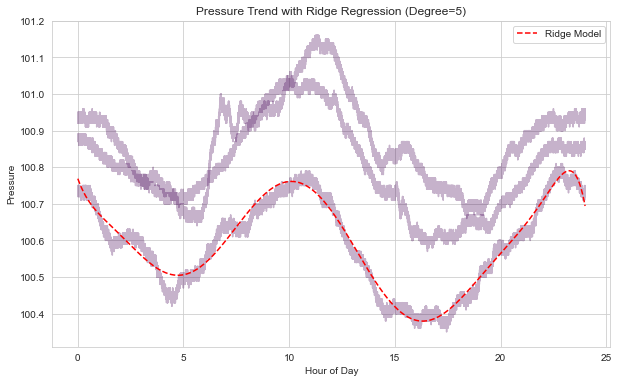

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Assuming you have already loaded and processed your DataFrame 'df'
df['datetime'] = pd.to_datetime(df['datetime'])

# Filter data for Sundays
sundays_data = df[df['datetime'].dt.dayofweek == 6]

plt.figure(figsize=(10, 6))

# Create a color map
cmap = get_cmap('viridis', len(sundays_data))

for i, (date, group) in enumerate(sundays_data.groupby(sundays_data['datetime'].dt.date)):
    x = group['datetime'].dt.hour + group['datetime'].dt.minute / 60 + group['datetime'].dt.second / 3600
    y = group['Pressure']
    
    plt.plot(x, y, color=cmap(i), alpha=0.3)

poly_features = PolynomialFeatures(degree=11
                                  )  # Reduced the degree to 5
x_poly = poly_features.fit_transform(x.values.reshape(-1, 1))  # Convert Series to NumPy array

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_poly, y)

x_range = np.linspace(x.min(), x.max(), 1000)
x_range_poly = poly_features.transform(x_range.reshape(-1, 1))

plt.plot(x_range, ridge_model.predict(x_range_poly), linestyle='dashed', color='red', label='Ridge Model')

plt.xlabel('Hour of Day')
plt.ylabel('Pressure')
plt.title('Pressure Trend with Ridge Regression (Degree=5)')
plt.legend()
plt.grid(True)

plt.show()


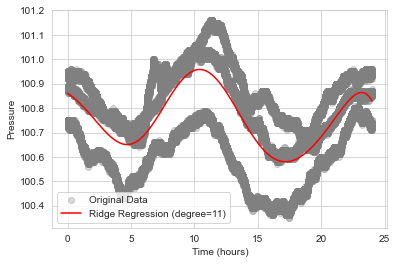

In [37]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Assuming 'df' contains the data
# Assuming 'x' is the datetime as hours
# Assuming 'y' is the pressure

# Extract features and target
x = np.array(sundays_data['datetime'].dt.hour + sundays_data['datetime'].dt.minute / 60 + sundays_data['datetime'].dt.second / 3600).reshape(-1, 1)
y = np.array(sundays_data['Pressure'])

# Define the degree of the polynomial features
degree = 11  # You can change this as needed

# Create a polynomial regression model with Ridge regularization
model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))

# Fit the model
model.fit(x, y)

# Generate x values for plotting the regression line
x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)

# Predict y values using the model
y_values = model.predict(x_values)

# Plot the original data
plt.scatter(x, y, color='gray', alpha=0.3, label='Original Data')

# Plot the regression line
plt.plot(x_values, y_values, color='red', label=f'Ridge Regression (degree={degree})')

plt.xlabel('Time (hours)')
plt.ylabel('Pressure')
plt.legend()
plt.show()


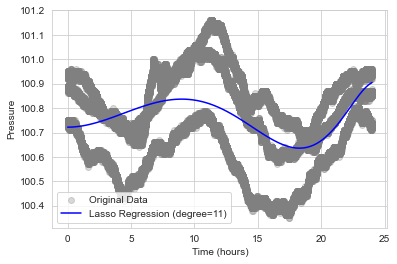

In [38]:
# Lasso
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Assuming 'df' contains the data
# Assuming 'x' is the datetime as hours
# Assuming 'y' is the pressure

# Extract features and target
x = np.array(sundays_data['datetime'].dt.hour + sundays_data['datetime'].dt.minute / 60 + sundays_data['datetime'].dt.second / 3600).reshape(-1, 1)
y = np.array(sundays_data['Pressure'])

# Define the degree of the polynomial features
degree = 11  # You can change this as needed

# Create a polynomial regression model with Lasso regularization
model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=0.1))  # Adjust alpha as needed

# Fit the model
model.fit(x, y)

# Generate x values for plotting the regression line
x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)

# Predict y values using the model
y_values = model.predict(x_values)

# Plot the original data
plt.scatter(x, y, color='gray', alpha=0.3, label='Original Data')

# Plot the regression line
plt.plot(x_values, y_values, color='blue', label=f'Lasso Regression (degree={degree})')

plt.xlabel('Time (hours)')
plt.ylabel('Pressure')
plt.legend()
plt.show()


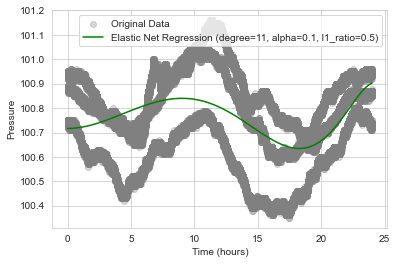

In [39]:
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Assuming 'df' contains the data
# Assuming 'x' is the datetime as hours
# Assuming 'y' is the pressure

# Extract features and target
x = np.array(sundays_data['datetime'].dt.hour + sundays_data['datetime'].dt.minute / 60 + sundays_data['datetime'].dt.second / 3600).reshape(-1, 1)
y = np.array(sundays_data['Pressure'])

# Define the degree of the polynomial features
degree = 11  # You can change this as needed

# Create an Elastic Net regression model
alpha = 0.1  # Adjust alpha as needed (controls the regularization strength)
l1_ratio = 0.5  # Adjust l1_ratio to control the L1 vs L2 penalty ratio
model = make_pipeline(PolynomialFeatures(degree), ElasticNet(alpha=alpha, l1_ratio=l1_ratio))

# Fit the model
model.fit(x, y)

# Generate x values for plotting the regression line
x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)

# Predict y values using the model
y_values = model.predict(x_values)

# Plot the original data
plt.scatter(x, y, color='gray', alpha=0.3, label='Original Data')

# Plot the regression line
plt.plot(x_values, y_values, color='green', label=f'Elastic Net Regression (degree={degree}, alpha={alpha}, l1_ratio={l1_ratio})')

plt.xlabel('Time (hours)')
plt.ylabel('Pressure')
plt.legend()
plt.show()


# Temperature 

In [40]:

# Assuming you have already loaded and processed your DataFrame 'df'

df['datetime'] = pd.to_datetime(df['datetime'])

mon_to_sat_data = df[(df['datetime'].dt.dayofweek >= 0) & (df['datetime'].dt.dayofweek <= 5)]

# Create empty lists to store evaluation metrics
mse_list = []
mae_list = []
r2_list = []
rmse_list = []

n_values = range(1, 51)

for n in n_values:
    mse_values = []
    mae_values = []
    r2_values = []
    rmse_values = []

    for date, group in mon_to_sat_data.groupby(mon_to_sat_data['datetime'].dt.date):
        x = group['datetime'].dt.hour + group['datetime'].dt.minute / 60 + group['datetime'].dt.second / 3600
        y = group['Temperature']

        poly_features = PolynomialFeatures(degree=n)  # Varying degree
        x_poly = poly_features.fit_transform(x.values.reshape(-1, 1))  

        model = LinearRegression()
        model.fit(x_poly, y)

        y_pred = model.predict(x_poly)
        mse = mean_squared_error(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        rmse = sqrt(mse)

        mse_values.append(mse)
        mae_values.append(mae)
        r2_values.append(r2)
        rmse_values.append(rmse)

    mse_list.append(np.mean(mse_values))
    mae_list.append(np.mean(mae_values))
    r2_list.append(np.mean(r2_values))
    rmse_list.append(np.mean(rmse_values))

# Find the best n based on a chosen metric (e.g., R^2)
best_n_index_temperature = np.argmax(r2_list)
best_n_temperature = n_values[best_n_index_temperature]

# Print evaluation metrics and best degrees
print("Evaluation Metrics:")
print(f"n\tMSE\t\tMAE\t\tR^2\t\tRMSE")
for i, n in enumerate(n_values):
    print(f"{n}\t{mse_list[i]:.4f}\t{mae_list[i]:.4f}\t{r2_list[i]:.4f}\t{rmse_list[i]:.4f}")

print("\nBest degrees:")
print(f"Best n value: {best_n_temperature}")


Evaluation Metrics:
n	MSE		MAE		R^2		RMSE
1	1.8964	1.2447	0.2668	1.3329
2	0.9148	0.7623	0.6532	0.9200
3	0.4572	0.5097	0.8243	0.6537
4	0.3334	0.4376	0.8735	0.5553
5	0.2952	0.3956	0.8857	0.5257
6	0.2926	0.3937	0.8866	0.5233
7	0.2277	0.3432	0.9122	0.4618
8	0.2236	0.3387	0.9136	0.4577
9	0.1502	0.2538	0.9428	0.3736
10	0.1431	0.2486	0.9451	0.3657
11	0.1337	0.2310	0.9487	0.3536
12	0.1400	0.2338	0.9461	0.3622
13	0.1649	0.2615	0.9353	0.3949
14	0.1826	0.2846	0.9274	0.4162
15	0.1798	0.2755	0.9276	0.4139
16	0.1794	0.2786	0.9270	0.4141
17	0.2036	0.3012	0.9166	0.4414
18	0.5338	0.5470	0.7821	0.7075
19	0.6592	0.6291	0.7319	0.7851
20	0.7791	0.6997	0.6843	0.8538
21	0.8892	0.7603	0.6410	0.9133
22	0.9878	0.8119	0.6025	0.9641
23	1.0749	0.8536	0.5686	1.0071
24	1.1514	0.8874	0.5390	1.0435
25	1.2188	0.9152	0.5128	1.0744
26	1.2792	0.9385	0.4894	1.1013
27	1.3333	0.9560	0.4683	1.1248
28	1.3848	0.9722	0.4482	1.1467
29	1.4321	0.9968	0.4296	1.1663
30	1.6790	1.1220	0.3323	1.2634
31	1.7311	1.1464	0.3118	1.2828
32	1.8

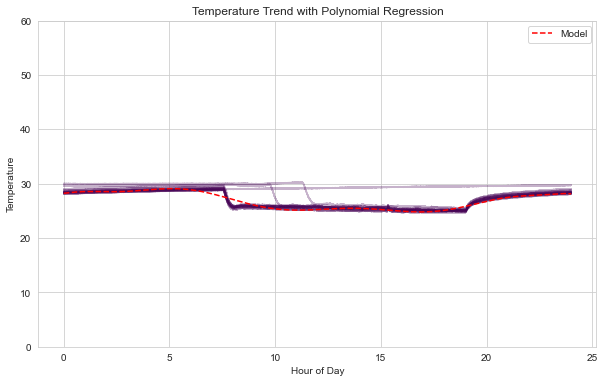

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib.cm import get_cmap

# Assuming you have already loaded and processed your DataFrame 'df'

df['datetime'] = pd.to_datetime(df['datetime'])

mon_to_sat_data = df[(df['datetime'].dt.dayofweek >= 0) & (df['datetime'].dt.dayofweek <= 5)]

plt.figure(figsize=(10, 6))

# Create a color map
cmap = get_cmap('viridis', len(mon_to_sat_data))

for i, (date, group) in enumerate(mon_to_sat_data.groupby(mon_to_sat_data['datetime'].dt.date)):
    x = group['datetime'].dt.hour + group['datetime'].dt.minute / 60 + group['datetime'].dt.second / 3600
    y = group['Temperature']
    
    plt.plot(x, y, color=cmap(i), alpha=0.3)

poly_features = PolynomialFeatures(degree=11)  # You can change the degree as needed
x_poly = poly_features.fit_transform(x.values.reshape(-1, 1))  # Convert Series to NumPy array

model = LinearRegression()
model.fit(x_poly, y)

x_range = np.linspace(x.min(), x.max(), 1000)
x_range_poly = poly_features.transform(x_range.reshape(-1, 1))

plt.plot(x_range, model.predict(x_range_poly), linestyle='dashed', color='red', label='Model')

plt.xlabel('Hour of Day')
plt.ylabel('Temperature')
plt.ylim(0, 60)  
plt.title('Temperature Trend with Polynomial Regression')
plt.legend()
plt.grid(True)

plt.show()


Evaluation Metrics:
n	MSE		MAE		R^2		RMSE
1	0.0030	0.0444	0.9635	0.0552
2	0.0006	0.0213	0.9927	0.0247
3	0.0001	0.0066	0.9992	0.0083
4	0.0000	0.0046	0.9997	0.0052
5	0.0000	0.0028	0.9998	0.0038
6	0.0000	0.0026	0.9998	0.0036
7	0.0000	0.0026	0.9998	0.0036
8	0.0000	0.0025	0.9998	0.0035
9	0.0000	0.0022	0.9999	0.0031
10	0.0000	0.0021	0.9999	0.0028
11	0.0000	0.0022	0.9999	0.0027
12	0.0004	0.0143	0.9946	0.0212
13	0.0023	0.0328	0.9728	0.0476
14	0.0035	0.0411	0.9582	0.0591
15	0.0049	0.0490	0.9415	0.0699
16	0.0064	0.0564	0.9237	0.0798
17	0.0117	0.0782	0.8593	0.1083
18	0.0133	0.0830	0.8408	0.1152
19	0.0148	0.0885	0.8231	0.1215
20	0.0162	0.0933	0.8061	0.1272
21	0.0175	0.0984	0.7899	0.1324
22	0.0188	0.1010	0.7744	0.1372
23	0.0201	0.1045	0.7596	0.1416
24	0.0212	0.1085	0.7455	0.1457
25	0.0223	0.1118	0.7321	0.1495
26	0.0234	0.1142	0.7194	0.1530
27	0.0295	0.1314	0.6459	0.1719
28	0.0304	0.1333	0.6350	0.1745
29	0.0313	0.1346	0.6247	0.1769
30	0.0321	0.1369	0.6150	0.1792
31	0.0329	0.1392	0.6059	0.1813
32	0.0

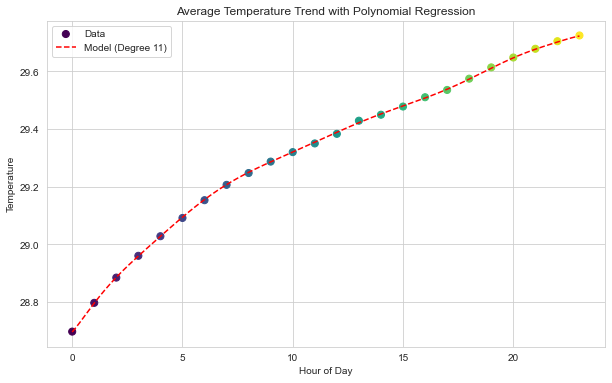

In [42]:
sundays_data_grouped = sundays_data.groupby([sundays_data['datetime'].dt.hour])['Temperature'].mean().reset_index()

# Create arrays for x and y values
x = sundays_data_grouped['datetime'].values.reshape(-1, 1)
y = sundays_data_grouped['Temperature'].values

# Create empty lists to store evaluation metrics
mse_list = []
mae_list = []
r2_list = []
rmse_list = []

n_values = range(1, 51)

for n in n_values:
    mse_values = []
    mae_values = []
    r2_values = []
    rmse_values = []

    poly_features = PolynomialFeatures(degree=n)
    x_poly = poly_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)

    y_pred = model.predict(x_poly)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    rmse = sqrt(mse)

    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)
    rmse_values.append(rmse)

    mse_list.append(np.mean(mse_values))
    mae_list.append(np.mean(mae_values))
    r2_list.append(np.mean(r2_values))
    rmse_list.append(np.mean(rmse_values))

# Find the best n based on a chosen metric (e.g., R^2)
best_n_index = np.argmax(r2_list)
best_n = n_values[best_n_index]

# Print evaluation metrics and best degrees
print("Evaluation Metrics:")
print(f"n\tMSE\t\tMAE\t\tR^2\t\tRMSE")
for i, n in enumerate(n_values):
    print(f"{n}\t{mse_list[i]:.4f}\t{mae_list[i]:.4f}\t{r2_list[i]:.4f}\t{rmse_list[i]:.4f}")

print("\nBest degrees:")
print(f"Best n value: {best_n}")

# Fit the model with the best degree
poly_features = PolynomialFeatures(degree=best_n)
x_poly = poly_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

# Print the model parameters
print("Model Parameters:")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Create a color map
cmap = get_cmap('viridis', len(sundays_data_grouped))

plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=range(len(sundays_data_grouped)), cmap=cmap, label='Data', s=50)

x_range = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)

y_pred = model.predict(x_range_poly)
plt.plot(x_range, y_pred, linestyle='dashed', color='red', label=f'Model (Degree {best_n})')

plt.xlabel('Hour of Day')
plt.ylabel('Temperature')
plt.title('Average Temperature Trend with Polynomial Regression')
plt.legend()
plt.grid(True)

plt.show()


# Baro_temp


Evaluation Metrics:
n	MSE		MAE		R^2		RMSE
1	0.0032	0.0457	0.9625	0.0562
2	0.0006	0.0209	0.9933	0.0238
3	0.0001	0.0057	0.9993	0.0077
4	0.0000	0.0048	0.9997	0.0054
5	0.0000	0.0029	0.9999	0.0035
6	0.0000	0.0024	0.9999	0.0032
7	0.0000	0.0024	0.9999	0.0031
8	0.0000	0.0024	0.9999	0.0031
9	0.0000	0.0023	0.9999	0.0029
10	0.0000	0.0021	0.9999	0.0026
11	0.0000	0.0022	0.9999	0.0026
12	0.0004	0.0138	0.9951	0.0204
13	0.0023	0.0327	0.9732	0.0475
14	0.0035	0.0407	0.9590	0.0588
15	0.0048	0.0487	0.9426	0.0695
16	0.0063	0.0563	0.9251	0.0794
17	0.0118	0.0789	0.8596	0.1087
18	0.0134	0.0837	0.8406	0.1158
19	0.0149	0.0894	0.8225	0.1222
20	0.0164	0.0942	0.8052	0.1281
21	0.0178	0.0993	0.7887	0.1334
22	0.0191	0.1020	0.7730	0.1382
23	0.0204	0.1050	0.7580	0.1427
24	0.0216	0.1090	0.7437	0.1469
25	0.0227	0.1126	0.7301	0.1507
26	0.0238	0.1154	0.7173	0.1543
27	0.0301	0.1328	0.6422	0.1736
28	0.0311	0.1348	0.6310	0.1762
29	0.0319	0.1362	0.6206	0.1787
30	0.0328	0.1385	0.6108	0.1810
31	0.0335	0.1408	0.6016	0.1831
32	0.0

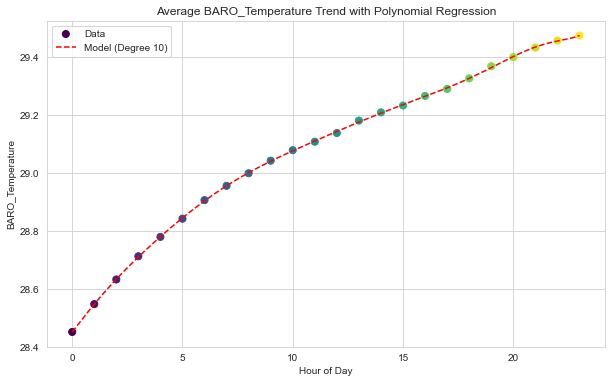

In [43]:
sundays_data_grouped = sundays_data.groupby([sundays_data['datetime'].dt.hour])['BARO_Temperature'].mean().reset_index()

# Create arrays for x and y values
x = sundays_data_grouped['datetime'].values.reshape(-1, 1)
y = sundays_data_grouped['BARO_Temperature'].values

# Create empty lists to store evaluation metrics
mse_list = []
mae_list = []
r2_list = []
rmse_list = []

n_values = range(1, 51)

for n in n_values:
    mse_values = []
    mae_values = []
    r2_values = []
    rmse_values = []

    poly_features = PolynomialFeatures(degree=n)
    x_poly = poly_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)

    y_pred = model.predict(x_poly)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    rmse = sqrt(mse)

    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)
    rmse_values.append(rmse)

    mse_list.append(np.mean(mse_values))
    mae_list.append(np.mean(mae_values))
    r2_list.append(np.mean(r2_values))
    rmse_list.append(np.mean(rmse_values))

# Find the best n based on a chosen metric (e.g., R^2)
best_n_index = np.argmax(r2_list)
best_n = n_values[best_n_index]

# Print evaluation metrics and best degrees
print("Evaluation Metrics:")
print(f"n\tMSE\t\tMAE\t\tR^2\t\tRMSE")
for i, n in enumerate(n_values):
    print(f"{n}\t{mse_list[i]:.4f}\t{mae_list[i]:.4f}\t{r2_list[i]:.4f}\t{rmse_list[i]:.4f}")

print("\nBest degrees:")
print(f"Best n value: {best_n}")

# Fit the model with the best degree
poly_features = PolynomialFeatures(degree=best_n)
x_poly = poly_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

# Print the model parameters
print("Model Parameters:")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Create a color map
cmap = get_cmap('viridis', len(sundays_data_grouped))

plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=range(len(sundays_data_grouped)), cmap=cmap, label='Data', s=50)

x_range = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)

y_pred = model.predict(x_range_poly)
plt.plot(x_range, y_pred, linestyle='dashed', color='red', label=f'Model (Degree {best_n})')

plt.xlabel('Hour of Day')
plt.ylabel('BARO_Temperature')
plt.title('Average BARO_Temperature Trend with Polynomial Regression')
plt.legend()
plt.grid(True)

plt.show()


# Humidity

In [ ]:

# Assuming you have already loaded and processed your DataFrame 'df'

df['datetime'] = pd.to_datetime(df['datetime'])

mon_to_sat_data = df[(df['datetime'].dt.dayofweek >= 0) & (df['datetime'].dt.dayofweek <= 5)]

# Create empty lists to store evaluation metrics
mse_list = []
mae_list = []
r2_list = []
rmse_list = []

n_values = range(1, 51)

for n in n_values:
    mse_values = []
    mae_values = []
    r2_values = []
    rmse_values = []

    for date, group in mon_to_sat_data.groupby(mon_to_sat_data['datetime'].dt.date):
        x = group['datetime'].dt.hour + group['datetime'].dt.minute / 60 + group['datetime'].dt.second / 3600
        y = group['Humidity']

        poly_features = PolynomialFeatures(degree=n)  # Varying degree
        x_poly = poly_features.fit_transform(x.values.reshape(-1, 1))  

        model = LinearRegression()
        model.fit(x_poly, y)

        y_pred = model.predict(x_poly)
        mse = mean_squared_error(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        rmse = sqrt(mse)

        mse_values.append(mse)
        mae_values.append(mae)
        r2_values.append(r2)
        rmse_values.append(rmse)

    mse_list.append(np.mean(mse_values))
    mae_list.append(np.mean(mae_values))
    r2_list.append(np.mean(r2_values))
    rmse_list.append(np.mean(rmse_values))

# Find the best n based on a chosen metric (e.g., R^2)
best_n_index_humidity = np.argmax(r2_list)
best_n_humidity = n_values[best_n_index_humidity]

# Print evaluation metrics and best degrees
print("Evaluation Metrics:")
print(f"n\tMSE\t\tMAE\t\tR^2\t\tRMSE")
for i, n in enumerate(n_values):
    print(f"{n}\t{mse_list[i]:.4f}\t{mae_list[i]:.4f}\t{r2_list[i]:.4f}\t{rmse_list[i]:.4f}")

print("\nBest degrees:")
print(f"Best n value: {best_n_humidity}")


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib.cm import get_cmap

# Assuming you have already loaded and processed your DataFrame 'df'

df['datetime'] = pd.to_datetime(df['datetime'])

mon_to_sat_data = df[(df['datetime'].dt.dayofweek >= 0) & (df['datetime'].dt.dayofweek <= 5)]

plt.figure(figsize=(10, 6))

# Create a color map
cmap = get_cmap('viridis', len(mon_to_sat_data))

for i, (date, group) in enumerate(mon_to_sat_data.groupby(mon_to_sat_data['datetime'].dt.date)):
    x = group['datetime'].dt.hour + group['datetime'].dt.minute / 60 + group['datetime'].dt.second / 3600
    y = group['Humidity']
    
    plt.plot(x, y, color=cmap(i), alpha=0.3)

poly_features = PolynomialFeatures(degree=12)  # You can change the degree as needed
x_poly = poly_features.fit_transform(x.values.reshape(-1, 1))  # Convert Series to NumPy array

model = LinearRegression()
model.fit(x_poly, y)

x_range = np.linspace(x.min(), x.max(), 1000)
x_range_poly = poly_features.transform(x_range.reshape(-1, 1))

plt.plot(x_range, model.predict(x_range_poly), linestyle='dashed', color='red', label='Model')

plt.xlabel('Hour of Day')
plt.ylabel('Humidity')
plt.ylim(0, 110)  
plt.title('Humidity Trend with Polynomial Regression')
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
sundays_data_grouped = sundays_data.groupby([sundays_data['datetime'].dt.hour])['Pressure'].mean().reset_index()

# Create arrays for x and y values
x = sundays_data_grouped['datetime'].values.reshape(-1, 1)
y = sundays_data_grouped['Pressure'].values

# Create empty lists to store evaluation metrics
mse_list = []
mae_list = []
r2_list = []
rmse_list = []

n_values = range(1, 51)

for n in n_values:
    mse_values = []
    mae_values = []
    r2_values = []
    rmse_values = []

    poly_features = PolynomialFeatures(degree=n)
    x_poly = poly_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)

    y_pred = model.predict(x_poly)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    rmse = sqrt(mse)

    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)
    rmse_values.append(rmse)

    mse_list.append(np.mean(mse_values))
    mae_list.append(np.mean(mae_values))
    r2_list.append(np.mean(r2_values))
    rmse_list.append(np.mean(rmse_values))

# Find the best n based on a chosen metric (e.g., R^2)
best_n_index = np.argmax(r2_list)
best_n = n_values[best_n_index]

# Print evaluation metrics and best degrees
print("Evaluation Metrics:")
print(f"n\tMSE\t\tMAE\t\tR^2\t\tRMSE")
for i, n in enumerate(n_values):
    print(f"{n}\t{mse_list[i]:.4f}\t{mae_list[i]:.4f}\t{r2_list[i]:.4f}\t{rmse_list[i]:.4f}")

print("\nBest degrees:")
print(f"Best n value: {best_n}")

# Fit the model with the best degree
poly_features = PolynomialFeatures(degree=best_n)
x_poly = poly_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

# Print the model parameters
print("Model Parameters:")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Create a color map
cmap = get_cmap('viridis', len(sundays_data_grouped))

plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=range(len(sundays_data_grouped)), cmap=cmap, label='Data', s=50)

x_range = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)

y_pred = model.predict(x_range_poly)
plt.plot(x_range, y_pred, linestyle='dashed', color='red', label=f'Model (Degree {best_n})')

plt.xlabel('Hour of Day')
plt.ylabel('Pressure')
plt.title('Average Pressure Trend with Polynomial Regression')
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# 假设您已经定义了模型 model 和数据 x_poly, y

# 自定义评分函数，确保得分在0到1之间
def custom_scorer(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    max_possible_mse = mean_squared_error(y, np.full_like(y, y.mean()))
    
    if max_possible_mse == 0:
        custom_score = 0  # 避免零除错误
    else:
        custom_score = max(0, 1 - mse / max_possible_mse)
    
    return custom_score

# 使用交叉验证并传入自定义的评分函数
scores = cross_val_score(model, x_poly, y, cv=5, scoring=make_scorer(custom_scorer))

# 输出得分
print(scores)



In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import cross_val_score

cvs_scores = cross_val_score(model, x_poly, y, cv=6  # 5折交叉验证


In [ ]:
cvs_scores

In [ ]:
cvs_mean = np.mean(cvs_scores)
cvs_mean

In [ ]:
from sklearn.neural_network import MLPRegressor

nn_model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000)
nn_model.fit(x_poly, y)

plt.plot(x_range, nn_model.predict(x_range_poly), linestyle='dashed', color='green', label='Neural Network Model')


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error


# Create a pipeline with PolynomialFeatures and LinearRegression
model = make_pipeline(PolynomialFeatures(degree=12), LinearRegression())

# Perform cross-validation
scores = cross_val_score(model, x_poly, y, cv=5)  # cv=5 specifies 5-fold cross-validation
print(scores)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error


# Fit the model and make predictions using cross-validation
y_pred = cross_val_predict(model, x_poly, y, cv=5)

# Calculate the residuals
residuals = y - y_pred

# Plot the residuals
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Calculate and print RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Perform goodness of fit test (You can choose an appropriate test)
# For example, you can use the F-test
from scipy.stats import f_oneway
f_statistic, p_value = f_oneway(y, y_pred)
print(f"F-statistic: {f_statistic}, p-value: {p_value}")

# Perform cross-validation and visualize results
cv_scores = cross_val_score(model, x_poly, y, cv=5)
print("Cross-validation scores:", cv_scores)
plt.subplot(1, 2, 2)
plt.boxplot(cv_scores)
plt.xlabel('Cross-validation folds')
plt.ylabel('R-squared')
plt.title('Cross-validation Results')

plt.tight_layout()
plt.show()


In [ ]:
RIDGE 

In [ ]:
# sunday 